<a href="https://colab.research.google.com/github/GHADAJUFAIR1/Bootcamps/blob/main/code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Collect** **and** **Explore** **The** **Data** 

In [1]:
import pandas as pd
import numpy as np 
import csv
import re # for regular expression
import string
import nltk 
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tokenize import RegexpTokenizer
from collections import Counter 

%matplotlib inline

In [2]:
from google.colab import drive 
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
Data = pd.read_excel ('gdrive/My Drive/EatmarnaDataset.xlsx')

In [4]:
Data.shape

(27870, 7)

In [5]:
Data.columns

Index(['id', '@username', 'display name', 'text', 'date', 'retweets', 'likes'], dtype='object')

In [6]:
#show first five dataframe content 
Data.head()

,id,@username,display name,text,date,retweets,likes
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,#اعتمرنا اصدار تصريح 🛑.\nمتوفر حجز تصاريح \nال...,2021-11-04T06:57:14+00:00,0,0
1,1456153488644362243,jiil3r,حجز العمرة #اعتمرنا,#اعتمرنا نسعد بخدمتكم في اصدار تصاريح لكل مما ...,2021-11-04T06:57:00+00:00,0,0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢.\nنستخرج لكم تصاريح من تطبيق اعت...,2021-11-04T06:40:15+00:00,0,0
4,1456147951710052354,9__Rema,ريما,#الاتحاد_الفتح\nاللي يبي حجز عمره أو صلاه أو ز...,2021-11-04T06:35:00+00:00,0,0


In [7]:
# explore the data type at each series
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27870 entries, 0 to 27869
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            27870 non-null  int64 
 1   @username     27870 non-null  object
 2   display name  27865 non-null  object
 3   text          27870 non-null  object
 4   date          27870 non-null  object
 5   retweets      27870 non-null  int64 
 6   likes         27870 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 1.5+ MB


In [8]:
# check to null values 
Data.isna().sum()

id              0
@username       0
display name    5
text            0
date            0
retweets        0
likes           0
dtype: int64

# **Clean** **the** **data**

In [9]:
Data.drop_duplicates(subset = "text", keep = False, inplace = True)
Data.head(5)

,id,@username,display name,text,date,retweets,likes
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,#اعتمرنا اصدار تصريح 🛑.\nمتوفر حجز تصاريح \nال...,2021-11-04T06:57:14+00:00,0,0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢.\nنستخرج لكم تصاريح من تطبيق اعت...,2021-11-04T06:40:15+00:00,0,0
4,1456147951710052354,9__Rema,ريما,#الاتحاد_الفتح\nاللي يبي حجز عمره أو صلاه أو ز...,2021-11-04T06:35:00+00:00,0,0
5,1456147896798167044,9__Rema,ريما,#كفر_قوي\nاللي يبي حجز عمره أو صلاه أو زياره ا...,2021-11-04T06:34:47+00:00,0,0


In [10]:
# how much data do I have after removing duplicated tweets?
len(Data)

24632

In [11]:
# Removing mentions and links from tweets
Data['text']=Data['text'].str.replace("(@[A-Za-z0-9_-]+)|(#[A-Za-z0-9_-]+)|http\S+", "")

In [12]:
# Removing hashtags and new lines from tweets
def processPost(tweet):
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)
    
    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
    tweet = tweet.replace('_',' ')
    tweet = tweet.replace('\r',' ')
        
    return tweet

In [13]:
Data["text"] = Data['text'].apply(lambda x: processPost(x))
Data.head(5)

,id,@username,display name,text,date,retweets,likes
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0


In [14]:
# remove punctuations علامات الترقيم  
arabic_punctuations = '''`÷×؛<>_()*&^%][ـ،/:"؟.,'{}~¦+|!”…“–ـ'''
english_punctuations = string.punctuation
punctuations_list = arabic_punctuations + english_punctuations

def remove_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)

In [15]:
def normalize_arabic(text):
    text = re.sub("[إأآا]", "ا", text)
    text = re.sub("ى", "ي", text)
    text = re.sub("ة", "ه", text)
    text = re.sub("گ", "ك", text)
    return text

In [16]:
# remove repeated letters
def remove_repeating_char(text):
    return re.sub(r'(.)\1+', r'\1', text)

In [17]:
#start processing the tweet
def processPost(tweet):

    #Replace @username with empty string
    tweet = re.sub('@[^\s]+', ' ', tweet)
    
    #Convert www.* or https?://* to " "
    tweet = re.sub('((www\.[^\s]+)|(https://[^\s]+))',' ',tweet)
    
    #Replace #word with word
    tweet = re.sub(r'#([^\s]+)', r'\1', tweet)

    # remove punctuations
    tweet= remove_punctuations(tweet)
    
    # normalize the tweet
    tweet= normalize_arabic(tweet)
    
    # remove repeated letters
    tweet=remove_repeating_char(tweet)

    #Remove new lines with white space
    tweet = tweet.replace('\n',' ')
    tweet = tweet.replace('\t',' ')
        
    return tweet
        

In [18]:
# apply the method in all the text and create another cloumn with the processed text
Data["clean text"] = Data['text'].apply(lambda x: processPost(x))
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...


In [19]:
#Remove Arabic stop words from the tweets
#importing nltk library
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
ar_stops = set(stopwords.words('arabic'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [20]:
# remove Arabic stop words from the tweets
for word in Data['text']:
    if word in ar_stops:        
        words_filtered.remove(word)

In [21]:
# Tokenizing the column 'text'
Data.dropna(subset = ["clean text"], inplace=True)
tokenizer = RegexpTokenizer(r'\w+')
Data["tokens"] = Data["clean text"].apply(tokenizer.tokenize)
all_words = [word for tokens in Data["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in Data ["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

                                          

508017 words total, with a vocabulary size of 22573
Max sentence length is 95


In [22]:
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال..."
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو..."
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,..."
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه..."
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ..."


In [23]:
print(Data.shape)

(24632, 9)


In [24]:
Data.columns

Index(['id', '@username', 'display name', 'text', 'date', 'retweets', 'likes',
       'clean text', 'tokens'],
      dtype='object')

In [25]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer

analyser = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


/usr/local/lib/python3.7/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [26]:
# Using polarity scores for knowing the polarity of each text
def sentiment_analyzer_score(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} {}".format(sentence, str(score)))

In [27]:
Data['scores'] = Data['clean text'].apply(lambda review: analyser.polarity_scores(review))
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."


In [28]:
Data['compound']  = Data['scores'].apply(lambda score_dict: score_dict['compound'])
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0


In [29]:
def Sentimnt(x):
    if x>= 0.05:
        return "Positive"
    elif x<= -0.05:
        return "Negative"
    else:
        return "Neutral"
Data['Sentiment'] = Data['compound'].apply(Sentimnt)
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral


In [30]:
import seaborn as sns
%matplotlib inline
var1 = Data.groupby('Sentiment').count()['text'].reset_index().sort_values(by='text',ascending=False)
sns.set_style("white")
sns.set_palette("Set2")
var1.style.background_gradient()

,Sentiment,text
1,Neutral,24358
2,Positive,219
0,Negative,55


In [31]:
Data.describe()

,id,retweets,likes,compound
count,2.463200e+04,24632.000000,24632.000000,24632.000000
mean,1.416248e+18,0.658128,1.107056,0.002922
std,3.320730e+16,8.704501,15.787707,0.046866
min,1.308018e+18,0.000000,0.000000,-0.790600
25%,1.408900e+18,0.000000,0.000000,0.000000
50%,1.415691e+18,0.000000,0.000000,0.000000
75%,1.443199e+18,0.000000,0.000000,0.000000
max,1.456479e+18,535.000000,1027.000000,0.947900


In [32]:
tweets_by_sentiment = Data['Sentiment'].value_counts()

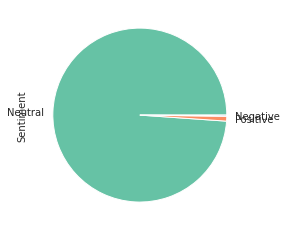

In [33]:
tweets_by_sentiment.plot(kind='pie')

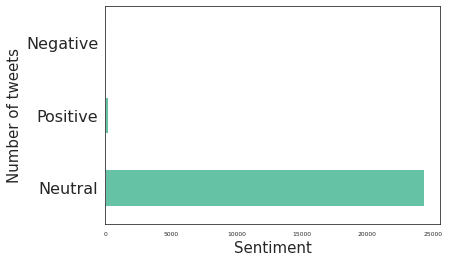

In [34]:
# visualize the results 
from matplotlib import pyplot as plt
fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=6)
ax.tick_params(axis='y', labelsize=16)

ax.set_xlabel('Sentiment', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)

tweets_by_sentiment.plot(ax=ax, kind='barh')

In [35]:
Data.drop_duplicates(subset='clean text',inplace=True)

In [36]:
tokenizer = RegexpTokenizer(r'\w+')
Data["clean text tokens"] = Data["clean text"].apply(tokenizer.tokenize)
Data.head(5)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment,clean text tokens
0,1456153547188445185,jiil3r,حجز العمرة #اعتمرنا,اعتمرنا اصدار تصريح 🛑. متوفر حجز تصاريح العمر...,2021-11-04T06:57:14+00:00,0,0,اعتمرنا اصدار تصريح 🛑 متوفر حجز تصاريح العمره📍...,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"[اعتمرنا, اصدار, تصريح, متوفر, حجز, تصاريح, ال..."
2,1456151700822241284,eatmarna14,حجز تصاريح عمره #اعتمرنا,من حجوزاتي الان صلاة الروضة الشريفة ليوم الجمع...,2021-11-04T06:49:54+00:00,0,0,من حجوزاتي الان صلاه الروضه الشريفه ليوم الجمع...,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"[من, حجوزاتي, الان, صلاه, الروضه, الشريفه, ليو..."
3,1456149271984680960,jiil3r,حجز العمرة #اعتمرنا,اصدار تصريح 🟢. نستخرج لكم تصاريح من تطبيق اعتم...,2021-11-04T06:40:15+00:00,0,0,اصدار تصريح 🟢 نستخرج لكم تصاريح من تطبيق اعتمر...,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"[اصدار, تصريح, نستخرج, لكم, تصاريح, من, تطبيق,..."
4,1456147951710052354,9__Rema,ريما,الاتحاد الفتح اللي يبي حجز عمره أو صلاه أو زيا...,2021-11-04T06:35:00+00:00,0,0,الاتحاد الفتح الي يبي حجز عمره او صلاه او زيار...,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"[الاتحاد, الفتح, الي, يبي, حجز, عمره, او, صلاه..."
5,1456147896798167044,9__Rema,ريما,كفر قوي اللي يبي حجز عمره أو صلاه أو زياره الي...,2021-11-04T06:34:47+00:00,0,0,كفر قوي الي يبي حجز عمره او صلاه او زياره اليو...,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ...","{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0,Neutral,"[كفر, قوي, الي, يبي, حجز, عمره, او, صلاه, او, ..."


In [37]:
ignore = {'', 'في', 'اله', 'RT', 'السلام', 'عليكم', 'و', 'تم', 'عندي', 'انا', 'الي', 'او', 'معنا', 'ان', 'عبر', 'يارب', 'اذا', 'يتم', 'من', 
          'مكن','تطبيق', 'احد', 'اي', 'علي', 'و', 'الي', 'التطبيق', 'ما', 'هل', 'لي', 'لم', 'عن', 'عن', 'ولا', 'مع', 'لا', 'الان',
         'وبركاته', 'ا', 'م', 'كل', 'له', 'لك', 'الا', 'ورحمه', 'يكون', 'بك', 'فيه', 'غير', 'قياس', 'ال', 'الهم', 'معي', 'يا', 'بعد',
         'توكلنا', 'اليوم', 'جميع', 'يوم', 'بنك', 'لكن', 'نور', 'الحمدله', 'الحمد', 'هذا', 'ايش', 'وش', 'يعني', 'قبل', 'انه', 'بشكل',
         'ل', 'شي', 'اني', 'ف', 'ب' ,'تغير', 'مو', 'حتي', 'وانا', 'لو', 'التحصيلي', 'اخذ', 'كذا', 'يطلع', 'ايام', 'بس', 'عشان', 'الع', 
         'متي', 'مره', 'فقط', 'كنت', 'عند', 'ولم', 'لان', 'كم', ''}

In [38]:
# remove words that is in the ignore list
all_words = [word for tokens in Data ["clean text tokens"] for word in tokens if not word in ignore]

sentence_lengths = [len(tokens) for tokens in Data ["clean text tokens"]]

VOCAB = sorted(list(set(all_words)))

print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

346170 words total, with a vocabulary size of 22480
Max sentence length is 95


In [39]:
# count the number of words
word_counter = Counter(all_words)
# show the most common words
word_counter.most_common(10)

[('اعتمرنا', 17738),
 ('حجز', 9513),
 ('عمره', 8132),
 ('الحجز', 4376),
 ('خاص', 4278),
 ('الروضه', 4176),
 ('الشريفه', 3955),
 ('لحجز', 3753),
 ('العمره', 3690),
 ('التواصل', 3347)]

In [40]:
# Display 10 least common lines
word_counter.most_common()[-10:]

[('ومتاكدين', 1),
 ('مابقي', 1),
 ('فالمعلومات', 1),
 ('327060', 1),
 ('احا', 1),
 ('حبيبنا', 1),
 ('الحلم', 1),
 ('وبالنزول', 1),
 ('متابه', 1),
 ('بالاحمر', 1)]

In [41]:
for_df=Data[Data["Sentiment"]=="Neutral"]
For_words = [ word for tokens in for_df["clean text tokens"] for word in tokens if not word in ignore]
for_word_counter = Counter(For_words)
for_word_counter.most_common(30)

[('اعتمرنا', 17666),
 ('حجز', 9471),
 ('عمره', 8074),
 ('الحجز', 4371),
 ('خاص', 4272),
 ('الروضه', 4174),
 ('الشريفه', 3953),
 ('لحجز', 3748),
 ('العمره', 3683),
 ('التواصل', 3344),
 ('مكه', 3128),
 ('الصلاه', 2760),
 ('تصريح', 2730),
 ('الحرم', 2379),
 ('الجمعه', 2304),
 ('تصاريح', 1922),
 ('صلاه', 1865),
 ('متوفر', 1710),
 ('الحرام', 1649),
 ('الحج', 1519),
 ('صلوات', 1437),
 ('اخر', 1382),
 ('يتواصل', 1380),
 ('المدينه', 1362),
 ('فوري', 1294),
 ('المسجد', 1290),
 ('لكم', 1273),
 ('تواصل', 1271),
 ('استفسار', 1258),
 ('ليوم', 1256)]

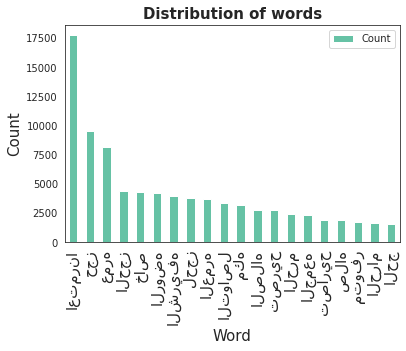

In [42]:
# store the top 20 words in a new data frame
lst = word_counter.most_common(20)
word_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
word_df.head()
word_df.set_index('Word', inplace=True)
# visualize the top 20 words

fig, ax = plt.subplots()

ax.tick_params(axis='x', labelsize=15,rotation=45)
ax.tick_params(axis='y', labelsize=10)

ax.set_xlabel('Word', fontsize=15)
ax.set_ylabel('Count' , fontsize=15)
ax.set_title('Distribution of words', fontsize=15, fontweight='bold')

word_df.plot(ax=ax, kind='bar')

In [43]:
# remove the "Neutral" class
Data=Data[Data['Sentiment'] != "Neutral"]

In [44]:
# preview dataframe to verify that neutral tweets are removed
Data.head(2)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment,clean text tokens
478,1454799825971695617,si12_20,سما لخدمات العمره .. 🌱🕋,لحجز الروضه الشريفه لليوم رجال ونساء حجز فوري...,2021-10-31T13:18:02+00:00,1,0,لحجز الروضه الشريفه ليوم رجال ونساء حجز فوري ح...,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز...","{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4215,Positive,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز..."
481,1454779374000132097,Zowar_,Zowar OTA,"أجواء روحانية تأسر القلوب .. ""Join us"" ( اعت...",2021-10-31T11:56:45+00:00,1,2,اجواء روحانيه تاسر القلوب Join us اعتمرنا,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]","{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,Positive,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]"


In [45]:
# change values to numeric
Data['Sentiment'] = Data['Sentiment'].map({'Positive': 1, 'Negative': 0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [46]:
Data.head(2)

,id,@username,display name,text,date,retweets,likes,clean text,tokens,scores,compound,Sentiment,clean text tokens
478,1454799825971695617,si12_20,سما لخدمات العمره .. 🌱🕋,لحجز الروضه الشريفه لليوم رجال ونساء حجز فوري...,2021-10-31T13:18:02+00:00,1,0,لحجز الروضه الشريفه ليوم رجال ونساء حجز فوري ح...,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز...","{'neg': 0.0, 'neu': 0.843, 'pos': 0.157, 'comp...",0.4215,1,"[لحجز, الروضه, الشريفه, ليوم, رجال, ونساء, حجز..."
481,1454779374000132097,Zowar_,Zowar OTA,"أجواء روحانية تأسر القلوب .. ""Join us"" ( اعت...",2021-10-31T11:56:45+00:00,1,2,اجواء روحانيه تاسر القلوب Join us اعتمرنا,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]","{'neg': 0.0, 'neu': 0.732, 'pos': 0.268, 'comp...",0.2960,1,"[اجواء, روحانيه, تاسر, القلوب, Join, us, اعتمرنا]"


In [47]:
# identify the data and the labels
tweet = Data['text']
target= Data['Sentiment']

In [48]:
# Use TfidfVectorizer for feature extraction (TFIDF to convert textual data to numeric form):
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer()
X = tf_vec.fit_transform(tweet)
X.shape

(263, 1543)

In [49]:
# Training Phase
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.33, random_state=0)

In [50]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(176, 1543) (87, 1543) (176,) (87,)


# **NAIVE** **BAYES** **model**

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score
from sklearn.metrics  import confusion_matrix, classification_report
from sklearn import metrics

In [52]:
# create the classifer and fit the training data and lables
classifier_nb = MultinomialNB().fit(X_train.todense(),y_train)

print("MultinomialNB accuracy: %.2f"%classifier_nb.score(X_test.todense(), y_test))

#do a 10 fold cross-validation 
results_nb = cross_val_score(classifier_nb, X.todense(),target, cv=10)
print("\n10-fold cross-validation:")
print(results_nb)

print("The average accuracy of the MultinomialNB classifier is : %.2f" % np.mean(results_nb))

print("\nConfusion matrix of the MultinomialNB classifier:")
predicted_nb = classifier_nb.predict(X_test.todense())
print(confusion_matrix(y_test,predicted_nb))


print("\nClassification_report of MultinomialNB classifier:")
print(classification_report(y_test,predicted_nb))
print("----------------------------------------------------------------------------")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:590: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn

MultinomialNB accuracy: 0.74

10-fold cross-validation:
[0.77777778 0.77777778 0.77777778 0.76923077 0.80769231 0.80769231
 0.80769231 0.80769231 0.80769231 0.80769231]
The average accuracy of the MultinomialNB classifier is : 0.79

Confusion matrix of the MultinomialNB classifier:
[[ 0 23]
 [ 0 64]]

Classification_report of MultinomialNB classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.74      1.00      0.85        64

    accuracy                           0.74        87
   macro avg       0.37      0.50      0.42        87
weighted avg       0.54      0.74      0.62        87

----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
# calculate the fpr and tpr for all thresholds of the classification
probs = classifier_nb.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

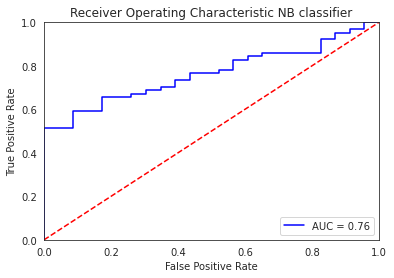

In [54]:
# plot the AUC for Naive Bayesian Classifier
plt.title('Receiver Operating Characteristic NB classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# **LOGISTIC** **REGRESSION** **model**

In [55]:
# build the second classifer, logsitic regrssion 
classifier_log =  LogisticRegression().fit(X_train,y_train)

In [56]:
print("Logisitic Accuracy: %.2F"%classifier_log.score(X_test, y_test))
results_log = cross_val_score(classifier_log, X,target, cv=10)


print("\n10-fold cross-validation:")
print(results_log)


print("The average accuracy of the Logisitic classifier is : %.2f" % np.mean(results_log))
print("\nConfusion matrix of the Logisitic classifier:")
predicted_log= classifier_log.predict(X_test)
print(confusion_matrix(y_test,predicted_log))


print("\nClassification_report of Logisitic classifier:")
print(classification_report(y_test,predicted_log))
print("----------------------------------------------------------------------------")

Logisitic Accuracy: 0.74

10-fold cross-validation:
[0.77777778 0.77777778 0.77777778 0.80769231 0.80769231 0.80769231
 0.80769231 0.80769231 0.80769231 0.80769231]
The average accuracy of the Logisitic classifier is : 0.80

Confusion matrix of the Logisitic classifier:
[[ 0 23]
 [ 0 64]]

Classification_report of Logisitic classifier:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       0.74      1.00      0.85        64

    accuracy                           0.74        87
   macro avg       0.37      0.50      0.42        87
weighted avg       0.54      0.74      0.62        87

----------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [57]:
# calculate the fpr and tpr for all thresholds of the classification

probs = classifier_log.predict_proba(X_test)
preds = probs[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

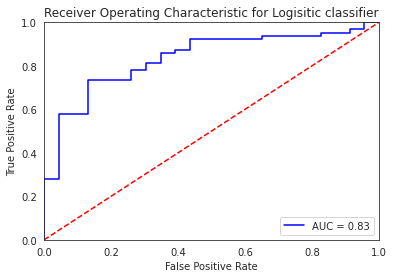

In [58]:
# polt AUC for Logistic Regression
plt.title('Receiver Operating Characteristic for Logisitic classifier')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()